In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Replace with your actual path if not in the same directory
df = pd.read_csv('MMU_iris_comparison_custom_results.csv') # MMU
# df = pd.read_csv('MMU_iris_comparison_normal_results.csv') # MMU
# df = pd.read_csv('Uburis_iris_comparison_custom_results.csv')
# df = pd.read_csv('Uburis_iris_comparison_normal_results.csv')


# Convert string boolean to actual boolean if necessary
df['same_eye'] = df['same_eye'].astype(bool)


In [35]:
# Threshold for determining 'same eye' based on score
threshold = 0.37

# Predict labels: True if score < threshold (same eye)
df['predicted_same'] = df['score'] < threshold


In [36]:
# Precision
# precision = precision_score(df['same_eye'], df['predicted_same'])
precision = (df['predicted_same'] & df['same_eye']).sum() / df['predicted_same'].sum() if df['predicted_same'].sum() > 0 else 0.0
print(f"Precision: {precision:.2f}")

recall = (df['predicted_same'] & df['same_eye']).sum() / df['same_eye'].sum() if df['same_eye'].sum() > 0 else 0.0
print(f"Recall: {recall:.2f}")

# False Accept Rate (FAR) = False Positives / Actual Negatives
false_accepts = ((df['same_eye'] == False) & (df['predicted_same'] == True)).sum()
true_negatives = (df['same_eye'] == False).sum()
print(f"False Accepts: {false_accepts}, True Negatives: {true_negatives}")
far = false_accepts / true_negatives

# False Reject Rate (FRR) = False Negatives / Actual Positives
false_rejects = ((df['same_eye'] == True) & (df['predicted_same'] == False)).sum()
true_positives = (df['same_eye'] == True).sum()
print(f"False Rejects: {false_rejects}, True Positives: {true_positives}")
frr = false_rejects / true_positives if true_positives > 0 else 0.0


Precision: 1.00
Recall: 0.98
False Accepts: 0, True Negatives: 4608
False Rejects: 16, True Positives: 938


In [37]:
print(f"Precision: {precision:.4f}")
print(f"False Accept Rate (FAR): {far:.4f}")
print(f"False Reject Rate (FRR): {frr:.4f}")


Precision: 1.0000
False Accept Rate (FAR): 0.0000
False Reject Rate (FRR): 0.0171


In [38]:
def compute_eer(y_true, scores):
    thresholds = np.linspace(0, 1, 1000)
    fars, frrs = [], []

    for t in thresholds:
        preds = scores < t
        fa = ((y_true == False) & (preds == True)).sum() / (y_true == False).sum()
        fr = ((y_true == True) & (preds == False)).sum() / (y_true == True).sum() if (y_true == True).sum() > 0 else 0.0
        fars.append(fa)
        frrs.append(fr)
    
    fars = np.array(fars)
    frrs = np.array(frrs)
    eer_index = np.nanargmin(np.abs(fars - frrs))
    eer = (fars[eer_index] + frrs[eer_index]) / 2
    eer_threshold = thresholds[eer_index]
    return eer, eer_threshold


In [39]:
eer_value, eer_threshold = compute_eer(df['same_eye'], df['score'])
print(f"Equal Error Rate (EER): {eer_value:.4f} at threshold = {eer_threshold:.4f}")


Equal Error Rate (EER): 0.0003 at threshold = 0.4044


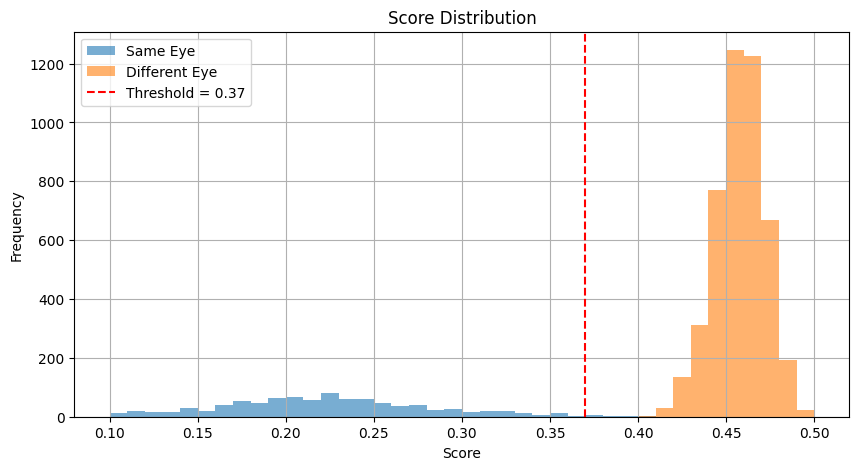

In [40]:
# Plot histogram of scores
plt.figure(figsize=(10, 5))
bins = np.arange(0.1, 0.5 + 0.01, 0.01)
plt.hist(df[df['same_eye'] == True]['score'], bins=bins, alpha=0.6, label='Same Eye')
plt.hist(df[df['same_eye'] == False]['score'], bins=bins, alpha=0.6, label='Different Eye')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
